## Energy levels of 4-site Heisenberg model 

### To be finished ...

The model hamiltonian is: $$H=J\sum_{<i,j>}\vec{S_i}\cdot \vec{S_j}=J\sum_{<i,j>}(\frac{1}{2}(S_i^+S_j^-+S_i^-S_j^+)+S_i^zS_j^z)$$ with the spin raising/lowering operators.<br><br> We consider $S=1/2$ 1-dimensional spin chain with only 4 sites $N =4$ here.

Notice that the Hamiltonian commutes with either $S^{z}_{tot} = \sum_{i}^{N} S^{z}_{i}$, total spin $S^{2}_{tot}=(\sum_{i} S_{i})^2$ or the translation (left shift) operator $T$, e.g. $T |\uparrow\uparrow\uparrow\downarrow\rangle = | \uparrow\uparrow\downarrow\uparrow \rangle$. Indeed, any two of these operators, {$H, S^{z}_{tot},S^{2}_{tot},T$} commutes with each other. Therefore, $S^z = -N/2,-N/2+1,...,N/2$, $S_{tot} = 0,1,...,N/2$ and $k = m2\pi /N, m = -\frac{N}{2}+1, -\frac{N}{2}+1, \dots ,\frac{N}{2}$ are $\bf{good}$ quantum numbers to describe a state and we can utilize them to block diagonalize $H$.

For a 4 sites chain, the above three quantum numbers are sufficient to depict all the states, which means each energy eigenstate must differ by at least one quantum numbers. Any energy eigenstate can be expressed as $\left | S,S^z,k\right \rangle$.

Below, we try to diagonalize the 4-site $H$ in both $S^z$ and $S_{tot}$ sectors such that the energy eigenstates we obtained are also the eigenstates of $S^z_{tot}$ and $S^{2}_{tot}$. 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
# set parameters
N=4
dimension=2**N
#spin chain with all spin-down
z='0'*N
# initialize hamiltonian
z

'0000'

In [5]:
def Get_H(N):
# Matrix Construction
    dimension = 2**N
    H=np.zeros((dimension,dimension))
    for a in range(dimension):
        state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
        l=len(state_chain)
        state_chain=z[0:N-l]+state_chain # make the length equal to N
        print(state_chain)
      # for PBC, we set i in range(N)
      # for OBC, we set i in range(N-1)
        for i in range(N):
            j=np.mod(i+1,N)
            state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
            l=len(state_chain)
            state_chain=z[0:N-l]+state_chain # make the length equal to N
     #       print(state_chain)
            if state_chain[i]==state_chain[j]:# i=j only diagonal elements
                H[a,a]+=0.25
    #            print('a:',a)
            else:                              # else, the raising/lowering operators also have contributions
                H[a,a]-=0.25
                # then exchange i,j
                element_i=state_chain[i]
                element_j=state_chain[j]
                #flip
                if max(i,j)==N-1:
                    if i>j:  #here we are doing the concatenation of string (you can try other methods)
    #                    print(state_chain)
                        state_chain1=element_i+state_chain[1:N-1]+element_j
    #                    print(state_chain)
                    else:
    #                    print(state_chain)
                        state_chain1=state_chain[0:i]+element_j+element_i
    #                    print(state_chain)
                else:
                    state_chain1=state_chain[0:i]+element_j+element_i+state_chain[j+1:]
    #            print(state_chain)
                b=int(state_chain1,2)
    #            print('a:',a)
    #            print('b:',b)
                H[a,b]+=0.5
    return H

In [6]:
def Get_eig(H):
    eig_value=np.real(np.linalg.eig(H)[0])# eigen_values
    eig_vec=np.real(np.linalg.eig(H)[1])  # eigenstates
    idx_sorted1 = np.argsort(eig_value)
    eig_value=eig_value[idx_sorted1]
    eig_vec=eig_vec[:,idx_sorted1]
    return eig_value, eig_vec

0000
0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111


Text(0.5, 1.0, 'Energy Level of Spin Chain')

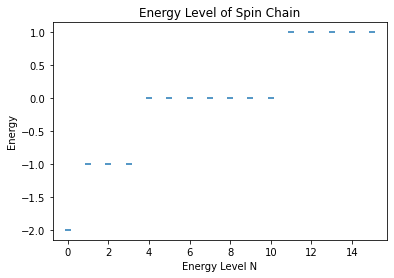

In [7]:
H = Get_H(N)
energy_level,eig_vec = Get_eig(H)

plt.scatter(np.arange(0,len(energy_level)),energy_level,marker='_')
plt.xlabel('Energy Level N')
plt.ylabel('Energy')
plt.title('Energy Level of Spin Chain')

In [8]:
 ##construct Sz matrix
def Get_Sz(N):
    dimension = 2**N
    mat_Sz = np.zeros((dimension,dimension))
    for a in range(dimension):
        state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
        l=len(state_chain)
        state_chain=z[0:N-l]+state_chain #make the length equal to N
        up_number=state_chain.count('1')
        down_number=N-up_number
        mat_Sz[a,a]=0.5*up_number-0.5*down_number
    return mat_Sz 

In [9]:
mat_Sz=Get_Sz(N);
np.diag(mat_Sz)

array([-2., -1., -1.,  0., -1.,  0.,  0.,  1., -1.,  0.,  0.,  1.,  0.,
        1.,  1.,  2.])

In [10]:
def Get_s2_tot(N):
    kron = np.kron
    eye = np.eye
    sx = 1/2*np.array([[0,1],[1,0]])
    sy = 1/2*np.array([[0,-1j],[1j,0]])
    sz= 1/2*np.array([[1,0],[0,-1]])
    s2_tot=N*3/4*eye(2**N,2**N);

    for s_here in range(N):
        for j in range(s_here+1,N):
            a = s_here
            b = j-s_here-1
            c = N-j-1
            s2_tot = s2_tot+2*kron(kron(kron(kron(eye(2**a),sx),eye(2**b)),sx),eye(2**c))
            s2_tot = s2_tot+2*kron(kron(kron(kron(eye(2**a),sy),eye(2**b)),sy),eye(2**c))
            s2_tot = s2_tot+2*kron(kron(kron(kron(eye(2**a),sz),eye(2**b)),sz),eye(2**c))
    return np.real(s2_tot)


In [11]:
s2_tot = Get_s2_tot(N)

In [12]:
if (H@s2_tot-s2_tot@H).any() != 0 :
    print('not commute')
else:
    print('S^2 and H commute')

S^2 and H commute


In [13]:
E_list = []
s2_list =[]
s_list = []
sz_list = []
psi_list = np.zeros((2**N,2**N))
index_all = range(2**N)

for sz_here in range(-N//2,N//2+1,1):
    index_sub = np.where(np.diag(mat_Sz) == sz_here)[0]
    s_here = s2_tot[index_sub,:][:,index_sub]
    H_sub = H[index_sub,:][:,index_sub] 
    if np.size(s_here)==1:
        D_sub = np.around(s_here)
        V_sub = np.array([1]).reshape(1,1)
    else:
        eig,eig_v = np.linalg.eig(s_here)
        D_sub = np.around(eig)
        idx = np.argsort(D_sub)
        D_sub=D_sub[idx]
        eig_v=eig_v[:,idx]
        V_sub = eig_v
        

    
    for s_here in range(abs(sz_here),N//2+1):
        s2_here = s_here*(s_here+1)
        idx = np.where(D_sub==s2_here)[0]
        
        V_subsub = V_sub[:,idx]
        for i in range(1,np.shape(V_subsub)[1]):  # Gram-Schmidt process
            for j in range(0,i):
                V_subsub[:,i]=V_subsub[:,i]-(V_subsub[:,j].T @ V_subsub[:,i])*V_subsub[:,j]
            V_subsub[:,i]=V_subsub[:,i]/np.linalg.norm(V_subsub[:,i])
        #print(V_subsub.T @ V_subsub)
        H_subsub = V_subsub.T @ H_sub @ V_subsub
        H_subsub = (H_subsub+H_subsub.T)/2
        eig, V_temp = np.linalg.eig(H_subsub)
        E_temp = np.real(eig)
        
        for i in range(len(E_temp)):
            E_list.append(np.around(E_temp[i],decimals=10))
            s2_list.append(s2_here)
            s_list.append(s_here)
            sz_list.append(sz_here)

Text(0, 0.5, 'E')

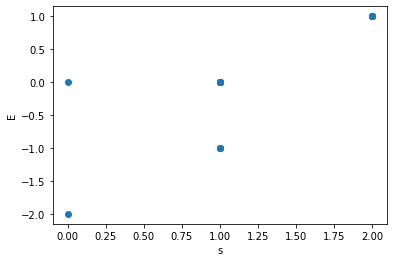

In [14]:
plt.scatter(s_list,E_list)
plt.xlabel(r"s")
plt.ylabel("E")

Text(0, 0.5, 'E')

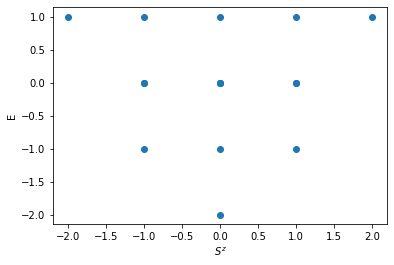

In [15]:
plt.scatter(sz_list,E_list)
plt.xlabel(r"$S^z$")
plt.ylabel("E")

Text(0, 0.5, 's')

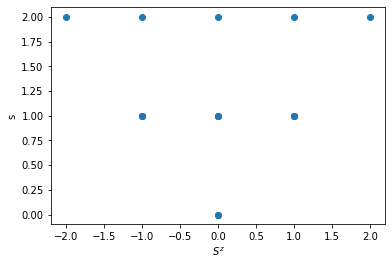

In [16]:
plt.scatter(sz_list,s_list)
plt.xlabel(r"$S^z$")
plt.ylabel("s")

## Diagonalize with $S^z_{tot}, S^2_{tot}$ and $T$


In [17]:
def bitcir(a,N):
    b=a[1:N]+a[0]
    return b

def kbasis(rep,period,nk,N):
    k=2*np.pi/N*nk
    v=np.zeros([2**N,1],dtype=complex)
    a=bin(rep)[2:]
    l=len(a)
    a=z[0:N-l]+a # make the length equal to N
    for n in range(0,period):
        v[int(a,2)]=(np.exp(n*1j*k))
        a=bitcir(a,N)
    v=v/np.sqrt(period)
    return v


In [18]:
N=4
dimension=2**N
#spin chain with all spin-down
z='0'*N
# initialize hamiltonian
z
H = Get_H(N)
s2_tot = Get_s2_tot(N)

0000
0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111


In [19]:
# Prepare blocks and their representative
state_temp=list(range(0,dimension))
blockrepresentative=[]
stateblock=np.zeros([dimension])
blockperiod=[]
blocknumber=0
while True:
    blocknumber=blocknumber+1
    state_here=state_temp[0]
    a=bin(state_here)[2:]
    l=len(a)
    a=z[0:N-l]+a # make the length equal to N
    state_temp.remove(state_here)
    stateblock[state_here]=blocknumber
    blockrepresentative.append(state_here)
    b=bitcir(a,N)
    period=1
    while b!=a:
        state_temp.remove(int(b,2))
        stateblock[int(b,2)]=blocknumber
        b=bitcir(b,N)
        period=period+1
    blockperiod.append(period)
    if state_here== dimension-1:
        break

In [20]:
# Count sz for each block
blocksz=[]
for i in range(0,blocknumber):
    sz_temp=0
    a=blockrepresentative[i]
    a=bin(a)[2:]
    l=len(a)
    a=z[0:N-l]+a # make the length equal to N
    for j in range(0,N):
        sz_temp+=int(a[j])-1/2
    blocksz.append(int(sz_temp))

In [21]:
E_list=[]
s2_list=[]
s_list=[]
sz_list=[]
k_list=[]
psi_list=[]
for sz_here in range(int(-N/2),int(N/2)+1):
    index_block=[i for i in range(0,blocknumber) if blocksz[i]==sz_here]
    period_here=[blockperiod[i] for i in index_block]
    for nk in range(int(-N/2)+1,int(N/2)+1):
        index_block_k=[index_block[i] for i in range(np.size(index_block)) if period_here[i]*nk%N==0]
        if not index_block_k:
            continue
        k=2*np.pi/N*nk
        V=np.empty([dimension,0],dtype=complex)
        for i in range(0,np.size(index_block_k)):
            index_here=index_block_k[i]
            rep_here=blockrepresentative[index_here]
            period_here_k=blockperiod[index_here]
            V=np.append(V,kbasis(rep_here,period_here_k,nk,N),axis=1)
        V=np.asmatrix(V)
        H_sub=V.H @ H @ V
        s2_sub=V.H @ s2_tot @ V
        [D_sub,V_sub]=np.linalg.eig(s2_sub)
        D_sub = [(np.around(np.real(i))) for i in D_sub]
        D_u=np.unique(D_sub)
        for s2_here in D_u:
            s_here=int(np.sqrt(s2_here+1/4)-1/2)
            V_subsub=np.empty([np.size(D_sub),0],dtype=complex)
            for i in range(0,np.size(D_sub)):
                if D_sub[i]==s2_here:
                    V_subsub=np.c_[V_subsub,V_sub[:,i]]
            size_temp=np.shape(V_subsub)[1]
            if size_temp==1:
                E_temp=np.around(np.real(V_subsub.H @ H_sub @ V_subsub),decimals=10)[0,0]
                psi_list.extend([np.around(V*V_subsub,decimals=10)])
                E_list.extend([E_temp])
            else:
                for i in range(1,size_temp):
                    for j in range(0,i):
                        V_subsub[:,i]=V_subsub[:,i]-(V_subsub[:,j].H @ V_subsub[:,i])[0,0] * V_subsub[:,j]
                    V_subsub[:,i]=V_subsub[:,i]/np.linalg.norm(V_subsub[:,i])
                H_subsub=V_subsub.H @ H_sub @ V_subsub
                H_subsub=(H_subsub+H_subsub.H)/2
                [D_temp,V_temp]=np.linalg.eig(H_subsub)
                E_temp=np.around(D_temp,decimals=10)
                E_temp=[np.real(e) for e in E_temp]
                psi_list.extend(np.around(V*V_subsub*V_temp,decimals=10))
                E_list.extend(E_temp)
            s2_list.extend([s2_here]*size_temp)
            s_list.extend([s_here]*size_temp)
            sz_list.extend([sz_here]*size_temp)
            k_list.extend([k]*size_temp)

([<matplotlib.axis.XTick at 0x7f118a6505d0>,
 [Text(0, 0, '$-\\pi$'),
  Text(0, 0, '$-\\pi/2$'),
  Text(0, 0, '0'),
  Text(0, 0, '$\\pi/2$'),
  Text(0, 0, '$\\pi$')])

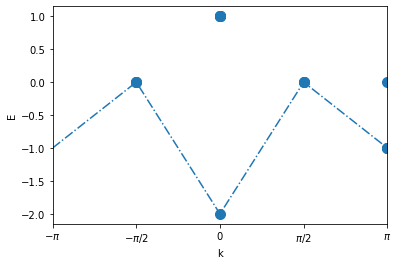

In [22]:
E_kmin=[]
for i in range(N):
    k=-np.pi+2*np.pi/N*i+2*np.pi/N
    E_temp=[E_list[j] for j in range(np.size(k_list)) if round(k_list[j]-k,6)==0]
    E_kmin.append(min(E_temp))
E_plot=[E_kmin[N-1]]
E_plot.extend(E_kmin)
plt.scatter(k_list,E_list,s=100)
plt.plot(np.arange(-np.pi,np.pi+2*np.pi/N,2*np.pi/N),E_plot,linestyle="-.")
plt.xlabel('k')
plt.ylabel('E')
plt.xlim(-np.pi, np.pi)
plt.xticks(np.arange(-np.pi,np.pi+0.1,np.pi/2),[r'$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$'])

Text(0, 0.5, 'E')

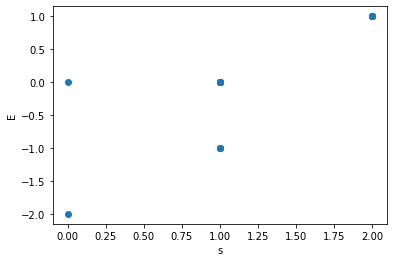

In [23]:
plt.scatter(s_list,E_list)
plt.xlabel('s')
plt.ylabel('E')

Text(0, 0.5, 'E')

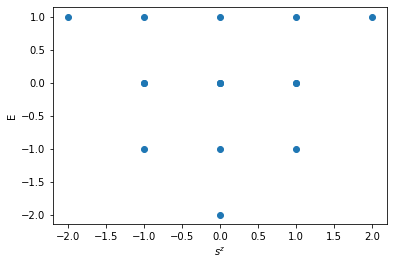

In [24]:
plt.scatter(sz_list,E_list)
plt.xlabel('$s^z$')
plt.ylabel('E')

Text(0, 0.5, '$S^2$')

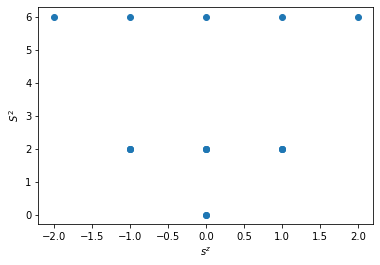

In [25]:
plt.scatter(sz_list,s2_list)
plt.xlabel('$s^z$')
plt.ylabel('$S^2$')